In [6]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import tensorflow as tf
import cv2
import imghdr

from tensorflow import keras
from keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout


In [2]:
train_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_data = ImageDataGenerator(rescale=1./255)

In [12]:
data_dir = r'C:\Users\AS\Desktop\Smiling or Not  Face Data\train' 

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [14]:
data_train = tf.keras.utils.image_dataset_from_directory(r"C:\Users\AS\Desktop\Smiling or Not  Face Data\train")

Found 1203 files belonging to 2 classes.


In [16]:
#data_test = tf.keras.utils.image_dataset_from_directory(r"C:\Users\AS\Desktop\Smiling or Not  Face Data\test")

In [19]:
data_iterator_train = data_train.as_numpy_iterator()
data_iterator_train

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000023ED72CAE50>)

In [70]:
batch = data_iterator_train.next()


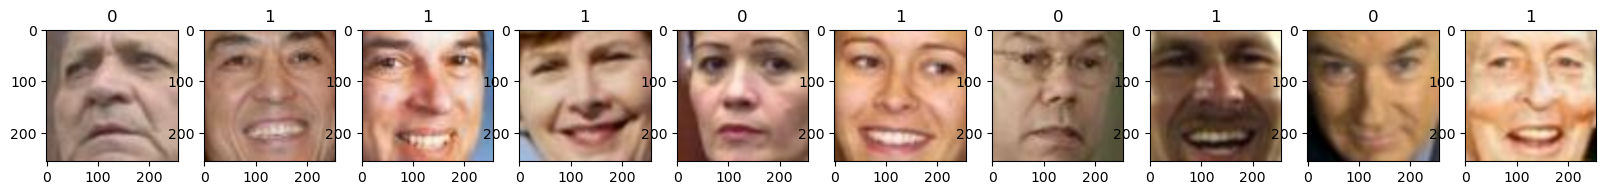

In [23]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
data = data_train.map(lambda x,y: (x/255, y))
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
data.as_numpy_iterator().next()

(array([[[[0.5372549 , 0.47843137, 0.3254902 ],
          [0.5372549 , 0.47843137, 0.3254902 ],
          [0.5416667 , 0.48284313, 0.32990196],
          ...,
          [0.5764706 , 0.54509807, 0.3647059 ],
          [0.5882353 , 0.5568628 , 0.3764706 ],
          [0.5882353 , 0.5568628 , 0.3764706 ]],
 
         [[0.5372549 , 0.47843137, 0.3254902 ],
          [0.5372549 , 0.47843137, 0.3254902 ],
          [0.5416667 , 0.48284313, 0.32990196],
          ...,
          [0.5764706 , 0.54509807, 0.3647059 ],
          [0.5882353 , 0.5568628 , 0.3764706 ],
          [0.5882353 , 0.5568628 , 0.3764706 ]],
 
         [[0.5421569 , 0.48333332, 0.33039215],
          [0.5421569 , 0.48333332, 0.33039215],
          [0.54650736, 0.48762256, 0.33486518],
          ...,
          [0.5754902 , 0.5441176 , 0.36372548],
          [0.5872549 , 0.55588233, 0.3754902 ],
          [0.5872549 , 0.55588233, 0.3754902 ]],
 
         ...,
 
         [[0.59117645, 0.52843136, 0.43823528],
          [0.59117

In [183]:
#split

train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

In [184]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [221]:
# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])


model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,584,961 (112.86 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

In [222]:
from tensorflow.keras import callbacks


In [223]:
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [224]:
hist = model.fit(train, validation_data = val, epochs=20, callbacks=callback_list)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4793 - loss: 0.6938 - val_accuracy: 0.4732 - val_loss: 0.6862 - learning_rate: 0.0100
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5748 - loss: 0.6862 - val_accuracy: 0.5982 - val_loss: 0.6641 - learning_rate: 0.0100
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6159 - loss: 0.6662 - val_accuracy: 0.5848 - val_loss: 0.6520 - learning_rate: 0.0100
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6346 - loss: 0.6367 - val_accuracy: 0.7545 - val_loss: 0.5852 - learning_rate: 0.0100
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6820 - loss: 0.6079 - val_accuracy: 0.8482 - val_loss: 0.4895 - learning_rate: 0.0100
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7185 - loss: 0.6018 - val_accuracy: 0.6518 - val_loss: 0.5601 - learning_rate: 0.0100
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7674 - loss: 0.4762 - val_accuracy: 

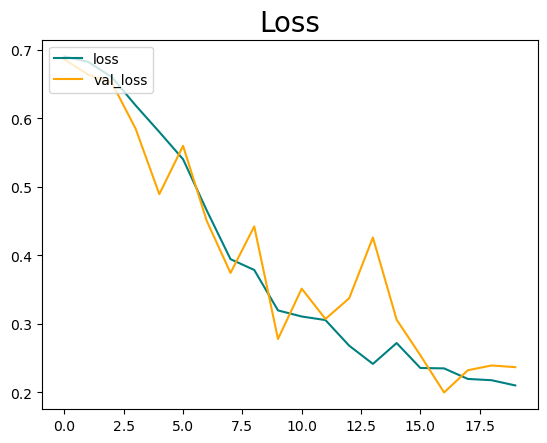

In [225]:
#optimizer='SGD'
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

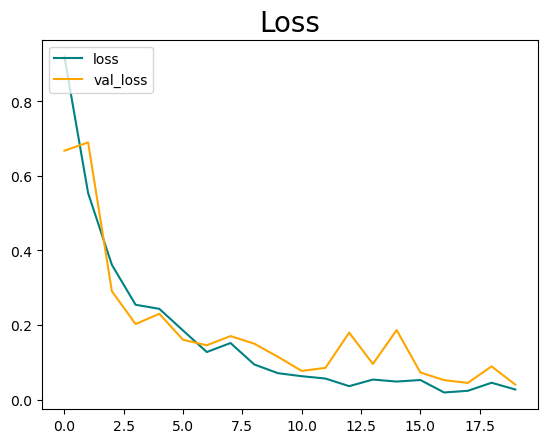

In [194]:
#adam
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

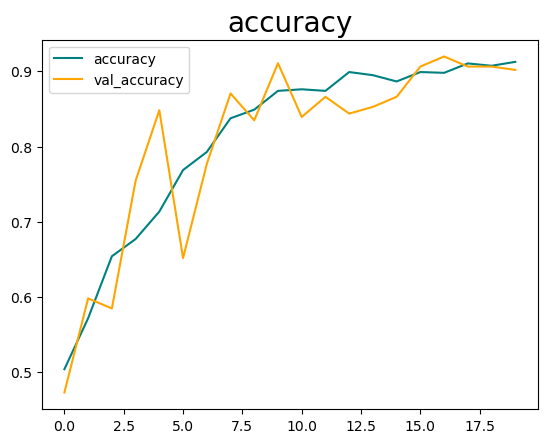

In [226]:
#SGD
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

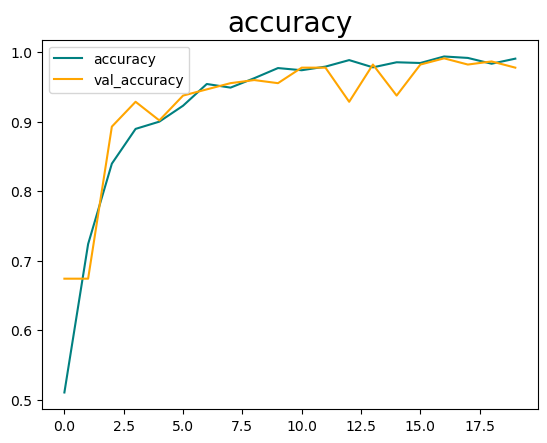

In [195]:
#adam
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [166]:
data_test_dir = r'C:\Users\AS\Desktop\Smiling or Not  Face Data\test_data' 

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [167]:
for image_class in os.listdir(data_test_dir): 
    for image in os.listdir(os.path.join(data_test_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Guiel_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Peirsol_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Peirsol_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Peirsol_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Peirsol_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Pena_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Sorkin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Sorkin_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Aaron_Tippin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Abbas_Kiarostami_0001.jpg
Issue with image C:\Users\AS\Deskto

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmad_Jbarah_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmad_Masood_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmad_Masood_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmed_Ahmed_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmed_Chalabi_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmed_Chalabi_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmed_Chalabi_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmed_Ghazi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmed_Qureia_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ahmet_Demir_0001.jpg
Issue with image C:\Users\AS\Desktop\Smi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Alejandro_Toledo_0019.jpg


Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Abbas_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Abdullah_Saleh_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Adbul_Karim_Madani_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Ahmeti_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Bin_Hussein_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Hammoud_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Khamenei_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Khamenei_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Khamenei_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ali_Naimi_0001.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Beard_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Beard_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Bynes_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Bynes_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Bynes_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Bynes_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Coetzer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Coetzer_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Marsh_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Amanda_Plumer_0001.jpg
Issue with image C:\Users\AS\Deskto

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Bernard_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Bunner_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Bunner_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Caldecott_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Cuomo_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Cuomo_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Fastow_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Firestone_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Gilligan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Andrew_Jarecki_0001.jpg
Issue with image C:\Us

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angela_Merkel_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angela_Merkel_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angela_Merkel_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angelica_Romero_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angelina_Jolie_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angelina_Jolie_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angelina_Jolie_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angelina_Jolie_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angelina_Jolie_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Angelina_Jolie_0007.jpg
Issue with image C:\Us

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Anthony_LaPaglia_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Anthony_Lee_Johnson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Anthony_Pico_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Anthony_Pisciotti_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Anthony_Principi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Anthony_Rackauckas_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Anthony_Scott_Miller_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Antje_Buschschulte_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Antonio_Banderas_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Antonio_Banderas_0

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0055.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0056.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0057.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0058.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0059.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0060.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0061.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0062.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0063.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ariel_Sharon_0064.jpg
Issue with image C:\Users\AS\Desktop\Smi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0032.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0033.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0034.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0035.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0036.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0037.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0038.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0039.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Arnold_Schwarzenegger_0040.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Fa

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Babe_Ruth_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Baburam_Bhattari_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Barbara_Bach_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Barbara_Becker_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Barbara_Bodine_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Barbara_Boxer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Barbara_Brezigar_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Barbara_Brezigar_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Barbara_De_Brun_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Barbara_Esbin_0001.jpg
Issue with image C:\Us

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bertie_Ahern_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bertie_Ahern_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bertie_Ahern_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bertie_Ahern_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bertrand_Bonello_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bertrand_Bonello_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bertrand_Delanoe_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Beth_Blough_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Beth_Jones_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Betsy_Coffin_0001.jpg
Issue with image C:\Users\AS\De

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bill_Gates_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Da

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Dole_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Dole_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Dole_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Eskridge_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Ferguson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Goldman_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Graham_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Graham_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Graham_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Bob_Graham_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Dat

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brendan_Hansen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brendan_Hansen_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brendan_Stai_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brenda_Magana_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brenda_van_Dam_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brenda_Wilson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brennon_Leighton_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brent_Coles_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brett_Boone_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Brett_Hawke_0001.jpg
Issue with image C:\Users\AS\De

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Butch_Davis_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Butch_Davis_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Buzz_Hargrove_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Byron_Scott_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cabas_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Caio_Blat_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Calbert_Cheaney_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Calista_Flockhart_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Calista_Flockhart_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Calista_Flockhart_0003.jpg
Issue with image C:\Users\AS\Deskt

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Moya_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Moya_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Moya_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Moya_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Moya_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Moya_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Moya_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Moya_0019.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Ortega_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Carlos_Ortega_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling o

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Catherine_Zeta-Jones_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\t

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlie_Sheen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlie_Zaa_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlie_Zaa_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlotte_Church_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlotte_Rampling_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlton_Heston_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlton_Heston_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlton_Heston_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlton_Heston_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Charlton_Heston_0006.jpg
Issue with image

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Christy_Turlington_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Andrews_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Bell_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Bell_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Byrd_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Byrd_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Claiborne_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Columbus_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Cookson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Chris_Cooper_0001.jpg
Issue with image C:\Users\AS\Deskto

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Clint_Howard_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Clive_Lloyd_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Clive_Woodward_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Coco_dEste_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Coleen_Rowley_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cole_Chapman_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Cowie_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Farrell_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Farrell_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Farrell_0005.jpg
Issue with image C:\Users\AS\Desktop\S

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0084.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0085.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0086.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0087.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0088.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0089.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0090.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0091.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0092.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0093.jpg
Issue with image C:\Users\AS\Desktop\Smi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0186.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0187.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0188.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0189.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0190.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0191.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0192.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0193.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0194.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Colin_Powell_0195.jpg
Issue with image C:\Users\AS\Desktop\Smi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Crandall_Bowles_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Crispin_Glover_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cristian_Barros_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cristina_Fernandez_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cristina_Fernandez_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cristina_Kirchner_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cristina_Saralegui_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cristina_Saralegui_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cristina_Torrens_Valero_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Cruz_Bustamant

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Darrell_Porter_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Darrell_Royal_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Darren_Campel_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Darren_Clarke_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Darryl_McDaniels_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Darvis_Patton_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Daryl_Hannah_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Daryl_Hannah_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Daryl_Smith_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Davey_Johnson_0001.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_Hyde_Pierce_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_Hyde_Pierce_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_Hyde_Pierce_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_Hyde_Pierce_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_Kelley_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_Kelley_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_Leahy_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_Leahy_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_McCallum_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\David_McCullough_0001.jpg
Issue with image

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Hastert_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Hastert_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Johnson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Kozlowski_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Kucinich_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Kucinich_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Kucinich_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Kucinich_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Kucinich_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dennis_Kucinich_0006.jpg
Issue with i

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Diego_Colorado_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dinah_Turner_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dinora_Rosales_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dino_de_Laurentis_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dino_de_Laurentis_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dino_Risi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Din_Samsudin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dionigi_Tettamanzi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dionne_Warwick_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dion_Glover_0001.jpg
Issue with image C:\Us

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0048.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0049.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0050.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0051.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0052.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0053.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0054.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0055.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0056.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Donald_Rumsfeld_0057.jpg
Issue with

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Don_Lake_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Don_Matthews_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Don_Meredith_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Don_Nickles_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Don_Nickles_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Don_Siegelman_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Don_Siegelman_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Don_Siegelman_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Dora_Bakoyianni_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Doris_Roberts_0001.jpg
Issue with image C:\Users\AS\Desktop\Sm

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduardo_Duhalde_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduardo_Duhalde_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduardo_Duhalde_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduardo_Duhalde_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduardo_Duhalde_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduardo_Duhalde_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduardo_Fischer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduardo_Romero_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduard_Limonov_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eduard_Shevardnadze_0001.jpg
Issue wi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Elizabeth_Smart_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Elizabeth_Smart_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Elizabeth_Smart_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Elizabeth_Smart_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Elizabeth_Smart_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Elizabeth_Taylor_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Elizabeth_Taylor_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ellen_Barkin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ellen_DeGeneres_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ellen_DeGeneres_0002.jpg
Issue with 

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erika_Christensen_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erika_Harold_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erika_Harold_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erika_Harold_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erika_Harold_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erika_Harold_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erika_Reyes_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Eriko_Tamura_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erik_Morales_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Erik_Morales_0003.jpg
Issue with image C:\Users\AS\Desktop

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fernando_Henrique_Cardoso_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fernando_Hierro_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fernando_Sanz_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fernando_Valenzuela_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fernando_Vargas_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fernando_Vargas_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fernando_Vargas_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fidel_Castro_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fidel_Castro_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Fidel_Castro_0003.jpg
Issue w

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Beckenbauer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Beckenbauer_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Fischler_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Fischler_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Fischler_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Fischler_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Gsell_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Muentefering_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Muentefering_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Franz_Muentefering_0003.jpg
Issue

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Brumley_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Brumley_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Brumley_III_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Clooney_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Clooney_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Clooney_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Clooney_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Clooney_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Clooney_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_Clooney_0008.jpg
Issue with image

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0019.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0020.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0111.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0112.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0113.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0114.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0115.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0116.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0117.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0118.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0119.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0120.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0209.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0210.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0211.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0212.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0213.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0214.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0215.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0216.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0217.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0218.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0300.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0301.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0302.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0303.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0304.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0305.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0306.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0307.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0308.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0309.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0400.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0401.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0402.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0403.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0404.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0405.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0406.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0407.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0408.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0409.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0493.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0494.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0495.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0496.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0497.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0498.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0499.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0500.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0501.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\George_W_Bush_0502.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0033.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0034.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0035.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0036.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0037.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0038.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0039.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0040.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder_0041.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gerhard_Schroeder

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gianna_Angelopoulos-Daskalaki_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Giannina_Facio_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gianni_Agnelli_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gian_Marco_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gian_Marco_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gian_Marco_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gideon_Black_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gideon_Yago_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gilberto_Rodriguez_Orejuela_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gilberto_Rodriguez_Orejuela_0002.

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\GL_Peiris_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\GL_Peiris_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\GL_Peiris_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Goh_Kun_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Goldie_Hawn_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Goldie_Hawn_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Goldie_Hawn_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Goldie_Hawn_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Goldie_Hawn_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Goldie_Hawn_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Da

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gregorio_Honasan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gregorio_Rosal_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gregory_Geoffroy_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gregory_Geoffroy_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gregory_Hines_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gregory_Hines_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gregory_Peck_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gregor_Gysi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Greg_Frers_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Greg_Gilbert_0002.jpg
Issue with image C:\Users\A

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gwyneth_Paltrow_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gwyneth_Paltrow_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Gwyneth_Paltrow_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Habib_Rizieq_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Habib_Rizieq_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Habib_Rizieq_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Habib_Rizieq_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hadley_Bilger_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Halbert_Fillinger_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Halle_Berry_0001.jpg
Issue with image C:\Users\

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0028.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0029.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0030.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0031.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0032.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0033.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0034.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0035.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0036.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hans_Blix_0037.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\t

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Heizo_Takenaka_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Heizo_Takenaka_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Heizo_Takenaka_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Heizo_Takenaka_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Heizo_Takenaka_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Helena_Schneider_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Helene_Eksterowicz_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Helen_Alvare_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Helen_Clark_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Helen_Clark_0002.jpg
Issue with image C:\Us

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Holly_Hunter_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Holly_Hunter_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Holly_Hunter_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Holly_Robinson_Peete_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hong_Myung_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hootie_Johnson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hootie_Johnson_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Horace_Donovan_Reid_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Horace_Newcomb_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Horacio_de_Jesus_Montoya_0001.jpg
Issue wit

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0034.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0035.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0036.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0037.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0038.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0039.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0040.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0041.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0042.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Hugo_Chavez_0043.jpg
Issue with image C:\Users\AS\Desktop\Smiling or No

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ibrahim_Al-Marashi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ibrahim_Haddad_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ibrahim_Hilal_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ibrahim_Jaafari_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ibrahim_Rugova_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Idi_Amin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ignacio_Antonio_Velasco_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ignatius_Wang_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Igor_Ivanov_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Igor_Ivanov_0002.jpg
Issue with image C:\

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jackie_Chan_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jackie_Chan_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jackie_Chan_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jackie_Chan_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jackie_Chan_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jackie_Dennis_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacky_Cheung_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jack_Goodman_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jack_Grubman_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jack_Grubman_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0043.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0044.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0045.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0046.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0047.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0048.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0049.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0050.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0051.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jacques_Chirac_0052.jpg
Issue with image C:\

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kelly_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kelly_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kelly_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kelly_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kelly_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kirtley_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kopp_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kopp_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kopp_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\James_Kopp_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not 

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jan_Ullrich_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jan_Ullrich_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jan_Ullrich_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jan_Ullrich_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jan_van_Breda_Kolff_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jaouad_Gharib_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jaqueline_Godoy_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jaromir_Jagr_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jason_Alexander_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jason_Alexander_0002.jpg
Issue with image C:\Users\A

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-David_Levitte_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-Francois_Lemounier_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-Francois_Pontal_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-Francois_Pontal_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-Francois_Pontal_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-Luc_Bideau_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-Marc_de_La_Sabliere_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-Marc_de_La_Sabliere_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean-Marc_Olive_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\tr

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0043.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0044.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0045.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0046.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0047.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0048.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0049.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0050.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0051.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jean_Chretien_0052.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0019.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0020.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0021.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0022.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0023.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati_0024.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jennifer_Capriati

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jeremy_Greenstock

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jimmy_Kimmel_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jimmy_Kimmel_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jimmy_Lee_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jimmy_Smits_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jimmy_Szymanski_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jim_Abbott_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jim_Ahern_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jim_Anderson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jim_Beattie_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jim_Bollman_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or 

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joaquin_Phoenix_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joaquin_Sanchez_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Job_Cohen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Job_Cohen_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jodie_Foster_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jodie_Foster_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jodie_Kidd_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jody_Richards_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joel_Gallen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joel_Todd_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling 

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Ashcroft_0011.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Edwards_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Edwards_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Edwards_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Edwards_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Edwards_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Edwards_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Edwards_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Elway_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Engler_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Fenn_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling o

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Moxley_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Nash_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Negroponte_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Negroponte_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Negroponte_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Negroponte_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Negroponte_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Negroponte_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Negroponte_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Negroponte_0008.jpg
Issue with image C:\

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Sununu_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Sweeney_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Swofford_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Swofford_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Swofford_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Taylor_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Taylor_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Thune_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Timoney_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\John_Timoney_0002.jpg
Issue with image C:\Users\AS\Desktop\Smili

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joschka_Fischer_0019.jpg
Issue with

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jose_Serra_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jose_Serra_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jose_Serra_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jose_Theodore_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jose_Vicente_Rangel_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jose_Viegas_Filho_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jose_Woldenberg_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joshua_Gracin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joshua_Harapko_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Joshua_Perper_0001.jpg
Issue with image C:\Users\

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Juergen_Trittin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Jules_Asner_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Julianna_Margulies_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Julianne_Moore_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Julianne_Moore_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Julianne_Moore_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Julianne_Moore_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Julianne_Moore_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Julianne_Moore_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Julianne_Moore_0007.jpg
Issue with image C

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0037.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0038.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0039.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0040.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0041.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0042.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0043.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0044.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi_0045.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Junichiro_Koizumi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kate_Winslet_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kate_Winslet_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kate_Winslet_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Katherine_Harris_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Katherine_Harris_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Katherine_Harris_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kathie_Louise_Saunders_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kathleen_Abernathy_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kathleen_Glynn_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kathleen_Glynn_0002.jpg
Issue wi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Costner_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Costner_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Costner_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Crane_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Garnett_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Gil_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Hearn_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_James_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Keegan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kevin_Marshall_0001.jpg
Issue with image C:\Users\AS\Desktop\Smi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kirk_Ferentz_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kirk_Ferentz_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kirk_Johnson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kirk_Johnson_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kirk_Johnson_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kirsten_Dunst_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kirsten_Gilham_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kitin_Munoz_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kit_Bond_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Kjell_Magne_Bondevik_0001.jpg
Issue with image C:\Users\AS\Deskt

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Armstrong_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Armstrong_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Armstrong_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Armstrong_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Armstrong_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Armstrong_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Armstrong_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Armstrong_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Bass_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lance_Bass_0002.jpg
Issue with image C:\

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Bush_0039.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Bush_0040.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Bush_0041.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Flessel_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Gobai_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Hernandez_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Linney_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Linney_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Linney_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Laura_Morante_0001.jpg
Issue with image C:\Users\AS\Desktop\Smili

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Leonid_Kuchma_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Leonid_Kuchma_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Leon_Barmore_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Leon_Lai_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Leon_LaPorte_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Leon_Silver_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Leo_Mullin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Leo_Ramirez_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\LeRoy_Millette_Jr_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lesia_Burlak_0001.jpg
Issue with image C:\Users\AS\Desktop\Smil

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Ling_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Marie_Presley_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Marie_Presley_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Marie_Presley_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Murkowski_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Raymond_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Raymond_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Stansfield_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lisa_Stone_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Liu_Mingkang_0001.jpg
Issue with image C:\Us

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lorraine_Fenton_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Louisa_Baileche_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Louis_Van_Gaal_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lou_Lang_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lou_Piniella_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lou_Piniella_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lou_Piniella_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lou_Reed_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lou_Ye_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Lubomir_Zaoralek_0001.jpg
Issue with image C:\Users\AS\Desktop\Smili

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0021.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0022.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0023.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0024.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0025.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0026.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0027.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0028.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Luiz_Inacio_Lula_da_Silva_0029.jpg
Issue with image C:

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0019.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0020.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0021.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0022.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0023.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0024.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0025.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mahmoud_Abbas_0026.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mariana_Pollack_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mariana_Pollack_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mariana_Pollack_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mariangel_Ruiz_Torrealba_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mariangel_Ruiz_Torrealba_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Marianne_Stanley_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mariano_Zabaleta_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Marian_Dolan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Maria_Callas_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Maria_Garcia_0001.jpg

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Hurlbert_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Hurlbert_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Kelly_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Komara_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Lazarus_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Leno_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Martin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_McClellan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Mishkin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mark_Mulder_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Scorsese_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Scorsese_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Scorsese_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Scorsese_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Scorsese_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Scorsese_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Sheen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Sheen_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Short_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Martin_Torrijos_0001.jpg
Issue with image C:

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Max_Mayfield_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Max_Mayfield_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Max_Mosley_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Max_von_Sydow_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mayumi_Moriyama_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\McGuire_Gibson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\MC_Hammer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Megan_Mullally_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Megawati_Sukarnoputri_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Megawati_Sukarnoputri_0003.jpg
Issue with image C:

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Bloomberg

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Kostelnik_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Leavitt_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Leavitt_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Lechner_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Linscott_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Lopez-Alegria_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_McNeely_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Moore_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Moore_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Michael_Moore_0003.jpg
Issue w

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Miguel_Estrada_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Miguel_Estrada_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Miguel_Hakim_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Miguel_Jimenez_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Miguel_Juarez_Perez_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Miguel_Rosseto_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mika_Hakkinen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mike_Alden_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mike_Babcock_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mike_Babcock_0002.jpg
Issue with image C:\Users\

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Kasyanov_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Kasyanov_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Khodorkovsky_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Shvydkoi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Wehbe_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Wehbe_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Wehbe_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Wehbe_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Youzhny_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mikhail_Youzhny_0002.jpg
Issue with

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Al-Douri_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Al-Douri_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Al_Hindi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Ashraf_Hafiz_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Baqir_al-Hakim_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Baqir_al-Hakim_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Baqir_al-Hakim_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Dahlan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Mohammed_Mehdi_Saleh_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Naji_Sabri_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Naji_Sabri_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Naji_Sabri_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Naji_Sabri_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Naji_Sabri_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Naji_Sabri_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Naji_Sabri_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Naji_Sabri_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Namuddu_Florence_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nancy_Demme_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Natasha_McElhone_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nate_Blackwell_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nate_Huffman_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nate_Hybl_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nathalia_Gillot_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nathalie_Baye_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nathalie_Baye_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nathalie_Baye_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nathalie_Baye_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nathalie_Gagnon_0001.jpg
Issue with image C:\Users\A

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nick_Nolte_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nick_Nolte_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nick_Nolte_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nick_Price_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nick_Rahall_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nick_Reilly_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nick_Turner_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nicolas_Cage_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nicolas_Cage_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nicolas_Cage_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Norm_Coleman_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Norm_Macdonald_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Norodom_Chakrapong_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Norodom_Sihanouk_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Norodom_Sihanouk_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Norodom_Sihanouk_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nova_Esther_Guthrie_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nuon_Chea_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nursultan_Nazarbayev_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Nursultan_Nazarbayev_0002.jpg


Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paradorn_Srichaphan_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paulina_Rodriguez_Davila_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Pauline_Landers_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paulo_Cesar_Pinheiro_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paulo_Cesar_Pinheiro_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Bettany_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Brandt_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Bremer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Bremer_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Bremer_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Bremer_0004.jpg
Issue with ima

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_ONeill_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_ONeill_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_ONeill_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_ONeill_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Otellini_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Patton_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Patton_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Pierce_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Pierce_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Paul_Reiser_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or 

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Albertsen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Arnett_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Arnett_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Arnett_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Bacanovic_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Bacanovic_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Camejo_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Care_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Caruana_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Peter_Chan_0001.jpg
Issue with image C:\Users\AS\Deskt

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Phil_Johnson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Phil_Mickelson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Phil_Mickelson_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Phil_Morris_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Phil_Vassar_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Phoenix_Chang_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Picabo_Street_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Pierce_Brosnan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Pierce_Brosnan_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Pierce_Brosnan_0004.jpg
Issue with image C:\Users\AS\D

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Qazi_Afzal_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Qazi_Hussain_Ahmed_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Qian_Qichen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Queen_Beatrix_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Queen_Beatrix_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Queen_Beatrix_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Queen_Elizabeth_II_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Queen_Elizabeth_II_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Queen_Elizabeth_II_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Queen_Elizabeth_II_0005.jpg
Issue with

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ramon_Santana_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Randall_Terry_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Randall_Tobias_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Randy_Brown_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Randy_Dryer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Randy_Ferbey_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Randy_Jackson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Randy_Johnson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Randy_Travis_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rand_Beers_0001.jpg
Issue with image C:\Users\AS\Desktop\S

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Regina_Ip_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Reinhard_Buetikofer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Renato_Soru_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rena_Sofer_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Renee_Zellweger_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Renee_Zellweger_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Renee_Zellweger_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Renee_Zellweger_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Renee_Zellweger_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Renee_Zellweger_0007.jpg
Issue with image C:\U

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Richard_Gephardt_0010.jpg


Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Barnes_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Barnes_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Barnes_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Bragg_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Carlisle_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Carlisle_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Carlisle_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Carlisle_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Caruso_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rick_Dinse_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_Bullock_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_Bullock_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_DeFraites_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_DeFraites_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_De_Niro_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_De_Niro_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_De_Niro_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_De_Niro_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_De_Niro_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robert_De_Niro_0006.jpg
Issue with image

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robinson_Stevenin_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robin_Cook_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robin_Cook_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robin_Johansen_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robin_McGraw_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robin_McLaurin_Williams_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robin_McLaurin_Williams_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robin_Williams_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Robin_Wright_Penn_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Rob_Lowe_0002.jpg
Issue with i

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0019.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0020.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0021.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0022.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0023.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roh_Moo-hyun_0024.jpg
Issue with image C:\Users\AS\Desktop\Smi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Blunt_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Halladay_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Jones_Jr_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Jones_Jr_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Moore_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Moore_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Moore_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Moore_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Moore_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Roy_Moore_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Dat

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sabah_Al-Ahmad_Al-Jaber_Al-Sabah_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Saburo_Kawabuchi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Saburo_Kawabuchi_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sachiko_Yamada_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sachiko_Yamada_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sachiko_Yamada_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sachiko_Yamada_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sachin_Tendulkar_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sadam_Hassan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sada_Jacobson_0001.jpg

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sandra_Ceccarelli_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sandra_Day_OConner_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sandra_Milo_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sandy_Smith_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sandy_Wise_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sanjay_Chawla_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sanjay_Gupta_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sanja_Papic_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Santiago_Botero_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\San_Lan_0001.jpg
Issue with image C:\Users\AS\Deskto

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sedigh_Barmak_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Selma_Phoenix_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sepp_Blatter_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sepp_Blatter_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sepp_Blatter_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Sepp_Blatter_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Serena_Karlan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Serena_Williams_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Serena_Williams_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Serena_Williams_0003.jpg
Issue with image C:\Users\AS

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shamai_Leibowitz_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shane_Hmiel_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shane_Loux_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shane_Mosley_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shane_Phillips_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shane_Reynolds_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shane_Warne_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shane_Warne_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shania_Twain_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Shanna_Zolman_0001.jpg
Issue with image C:\Users\AS\Desktop

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Silvio_Berlusconi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stan_Kasten_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stan_Kroenke_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stefaan_Declerk_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stefano_Accorsi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stefano_Accorsi_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stefano_Basalini_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stefano_Gabbana_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stefan_Holm_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stefan_Koubek_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Stefan_Tafrov_0001.jpg
Issue with image C:\User

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_McManaman_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Nash_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Nash_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Nash_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Nash_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Nash_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Nesbitt_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Pagliuca_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Park_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Steve_Park_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or 

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Taha_Yassin_Ramadan_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_Bradshaw_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_Gilliam_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_Hoeppner_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_Lynn_Barton_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_McAuliffe_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_McAuliffe_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_Semel_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_Stotts_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Terry_Stotts_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Teruaki_Masumoto_0001.jpg
Issue with image C:\U

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tiger_Woods_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or No

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tommy_Franks_0010.jpg
Issue with image C:\Users\AS\Desktop\Smi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tom_Hanks_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\t

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0017.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0018.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0019.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0020.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0021.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0022.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0023.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Da

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0106.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0107.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0108.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0109.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0110.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0111.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0112.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0113.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0114.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tony_Blair_0115.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Da

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Trista_Rehn_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Troy_Aikman_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Troy_Garity_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Troy_Hudson_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Troy_Jenkins_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Troy_Polamalu_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Trudi_Lacey_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tsutomu_Takebe_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tsutomu_Takebe_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Tubby_Smith_0001.jpg
Issue with image C:\Users\AS\Desktop\Smil

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Venus_Williams_0009.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Venus_Williams_0010.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Venus_Williams_0011.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Venus_Williams_0012.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Venus_Williams_0013.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Venus_Williams_0014.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Venus_Williams_0015.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Venus_Williams_0016.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vernon_Forrest_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Veronica_Lake_0001.jpg
Issue with image C:\U

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Golovlyov_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Meciar_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Putin_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Putin_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Putin_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Putin_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Putin_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Putin_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Putin_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Vladimir_Putin_0008.jpg
Issue with imag

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Warren_Beatty_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Warren_Buffett_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Warren_Buffett_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Warren_Buffett_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Warren_Truss_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Wayne_Allard_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Wayne_Ferreira_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Wayne_Ferreira_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Wayne_Ferreira_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Wayne_Ferreira_0004.jpg
Issue with image C:\Users

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Will_Ferrell_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Will_Ofenheusle_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Will_Self_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Will_Smith_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Will_Young_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Wilma_McNabb_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Wilton_Gregory_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Wim_Duisenberg_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Winona_Ryder_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Winona_Ryder_0002.jpg
Issue with image C:\Users\AS\Desktop\Smi

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasser_Arafat_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasser_Arafat_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasser_Arafat_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasser_Arafat_0005.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasser_Arafat_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasser_Arafat_0007.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasser_Arafat_0008.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasushi_Akashi_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yasushi_Chimura_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Yevgeny_Kafelnikov_0001.jpg
Issue with image C:\Us

Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zinedine_Zidane_0006.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Ziwang_Xu_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zoe_Ball_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zoran_Djindjic_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zoran_Djindjic_0002.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zoran_Djindjic_0003.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zoran_Djindjic_0004.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zorica_Radovic_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zulfiqar_Ahmed_0001.jpg
Issue with image C:\Users\AS\Desktop\Smiling or Not  Face Data\train\test\Zumrati_Juma_0001.jpg
Issue with image C:\Users\AS\Des

In [227]:
data_test = tf.keras.utils.image_dataset_from_directory(r"C:\Users\AS\Desktop\Smiling or Not  Face Data\test_data")

Found 12030 files belonging to 1 classes.


In [228]:
data_test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [229]:
data_iterator_test = data_test.as_numpy_iterator()
#batch_test = data_iterator_test.next()



In [230]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [231]:
pre = Precision()
re = Recall()
bacc = BinaryAccuracy()

In [232]:
for batch in data_iterator_test: 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    bacc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [233]:
print(pre.result(), re.result(), bacc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.53200334, shape=(), dtype=float32)


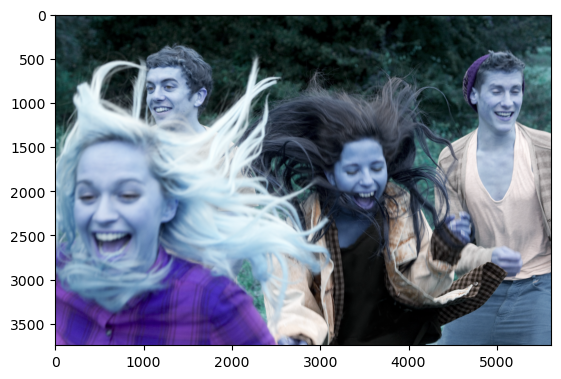

In [234]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [235]:
#print(img.shape)

In [236]:
resize = tf.image.resize(img, (256,256))
#resize

In [237]:
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [238]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [239]:
yhat

array([[0.04030079]], dtype=float32)

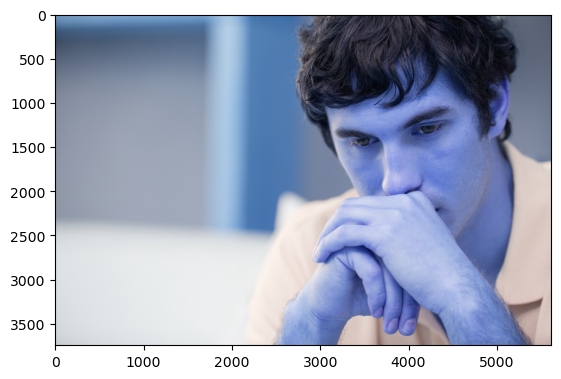

In [240]:
img2 = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img2)
plt.show()

In [241]:
resize2 = tf.image.resize(img2, (256,256))

In [242]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [243]:
yhat2

array([[0.88278335]], dtype=float32)

In [244]:
yh =[yhat , yhat2]
for i in yh:
    if i > 0.5: 
        print(f'Predicted class is sad')
        print(i)
    else:
        print(f'Predicted class is Happy')
        print(i)

Predicted class is Happy
[[0.04030079]]
Predicted class is sad
[[0.88278335]]
